# Assignment 1: Network Analysis and Modeling

**Course:** Social Graphs and Interactions (02805)  
**Semester:** Spring 2025  
**Technical University of Denmark**

---

## Group Information

**Group Members:**
- Thor Nørgaard Eriksen (s204618)
- Søren Mondrup (s214983)

---

## Introduction

This assignment explores fundamental concepts in network science through both theoretical modeling and practical data analysis. The assignment is divided into two main parts:

**Part 1** focuses on understanding and implementing classic network models—the Watts-Strogatz (WS) model for small-world networks and the Barabási-Albert (BA) model for scale-free networks. Through these exercises, we examine the mathematical properties and structural characteristics that distinguish these models from random networks.

**Part 2** involves building and analyzing a real-world network of Rock Musicians extracted from Wikipedia. This practical component demonstrates the application of network science principles to actual data, including data collection, network construction, statistical analysis, and visualization.

Together, these parts provide a comprehensive foundation in both the theoretical frameworks and practical methodologies essential for network analysis.

---

## Table of Contents

1. [Assignment 1.1: Exploring WS and BA Models](#assignment-11-exploring-ws-and-ba-models)
   - [Reading Questions](#reading-questions)
   - [WS Edition](#ws-edition)
   - [BA Edition](#ba-edition)

2. [Assignment 1.2: Stats and Visualization of the Rock Music Network](#assignment-12-stats-and-visualization-of-the-rock-music-network)
   - [Process Explanation](#process-explanation)
   - [Simple Network Statistics and Analysis](#simple-network-statistics-and-analysis)
   - [Network Visualization](#network-visualization)

3. [References](#references)

---

## Assignment 1.1: Exploring WS and BA Models

### Reading Questions



**Questions:**
- What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
- List the four regimes that characterize random networks as a function of $\langle k \rangle$.
- According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

#### What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
> It misses the fact that some nodes are outliers (hubs) that connect to way more than $\langle k \rangle$ other nodes. If using a random network the range between $k_{min}$ and $k_{max}$ is going to be artificially narrow, which means the network almost never sees a President Roosevelt with 22,000 known aquaintances or Facebook users with more than 5,000 friends. This is also seen in [Barabasi - Image 3.6]  where the green line is a poisson prediction and the purple dots are the actual degree-distributions of real world networks. $p_k$ decreases a lot faster for rising $k$ in the poisson than in the real examples, but is also too low for low k. The area around $\langle k \rangle$ is the only place where the poisson overestimates the probability, which leads to a distribution with short tails.

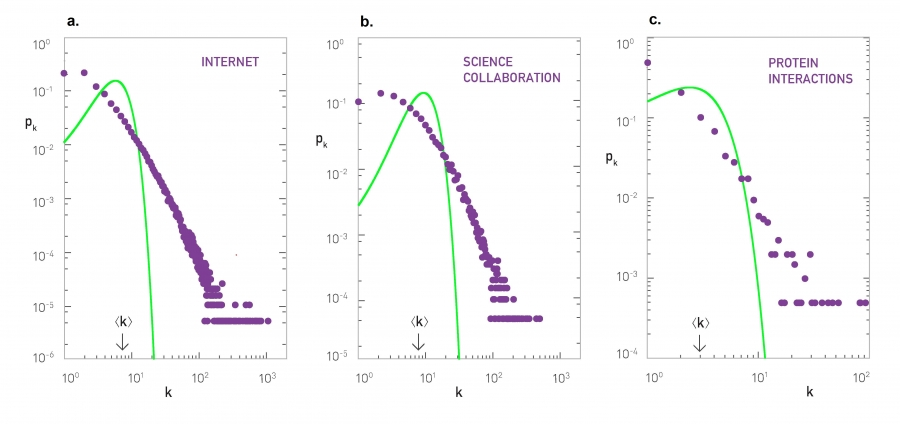

Reference: Barabási, A.-L. (2016). Network Science, Chapter 3, Section 3.5 and Image 3.6

#### List the four regimes that characterize random networks as a function of $\langle k \rangle$.
> * Subcritical Regime $(\langle k \rangle < 1)$
>
>  No giant component can form. Very sparse network and a number of tiny clusters depending on $\langle k \rangle$. The size of the largest cluster $N_G$ increases slower $(ln N)$ than the sizer of the network, so the relative size of the largest cluster goes to zero for large $N$.
>
> * Critical point $(\langle k \rangle = 1)$
>
> First formation of a giant component. $N_G  \approx  N^{2/3}$ so still less than N leading it to still go to zero as N increases. $N_G$ is significantly higher than in Subcritical in absolute terms.
>
> * Supercritical Regime $(1 < \langle k \rangle < ln N)$
>
> The most relevant when comparing to real systems. We now have a giant component. $\langle k \rangle$ close to 1, the fraction of nodes in the giant component is $N_G \approx (p-p_c)N$ where p_c approx 1/N
>
> * Connected regime $(\langle k \rangle > ln N)$
>
> Giant component absorbs all nodes (Nɢ = N), creating a fully connected network. Network can still be sparse despite full connectivity.

Reference: Barabási, A.-L. (2016). Network Science, Chapter 3, Section 3.6

#### According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?
> Random network theory predicts $C_i = \frac{ \langle k \rangle}{N}$ [Equation 3.21], which means: Clustering decreases as 1/N for growing networks with fixed ⟨k⟩, and that clustering is independent of a node's degree k. Real networks contradict both of these claims: $C$ is independent of network size $N$, but strongly dependent on degree $k$, decreasing for high-degree nodes. Both of those predictions are shown against real data in [Barabasi - Image 3.13] below.
>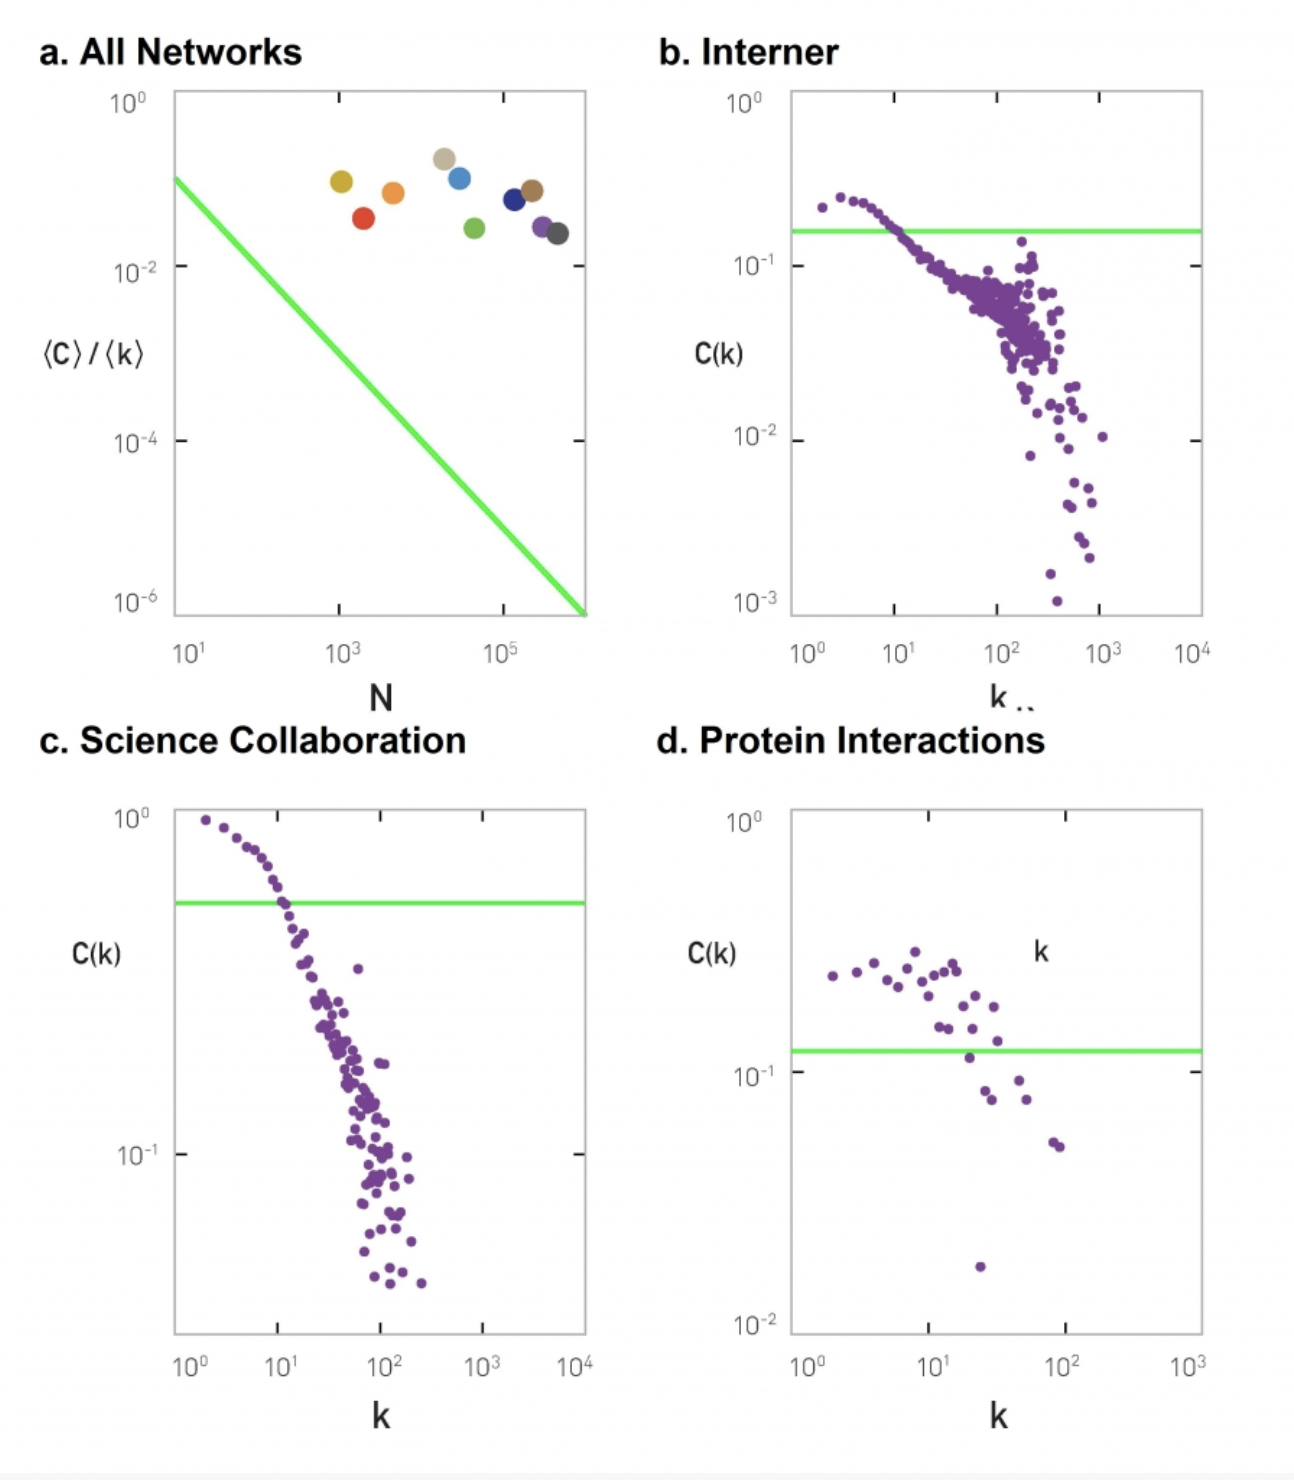
> Illustration that the prediction that $C$ scales negatively with $N$ is shown to be false in a. The network size has no systematic influence on the clustering. The other three show how the average clustering coefficent is decreasing for rising k, directly disproving the other prediction in equation 3.21. Increasing the degree of a node clearly decreases the average clustering.

Reference: Barabási, A.-L. (2016). Network Science, Chapter 3, Section 3.9

### Watts-Strogatz Edition


We start by plotting the graphs with the three different rewiring probabilities, while keeping number of nodes and average degree constant.

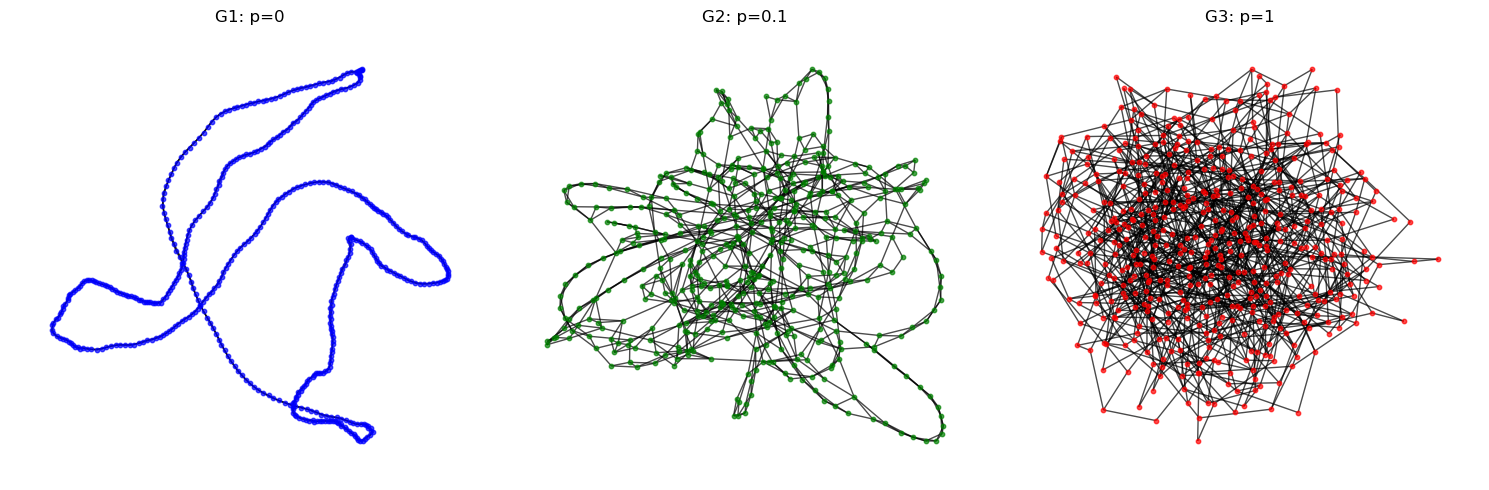

Watts-Strogatz Graphs:
G1 (p=0): Average shortest path length: 62.88
G2 (p=0.1): Average shortest path length: 7.78
G3 (p=1): Average shortest path length: 4.76
G1 (p=0): Clustering coefficient: 0.500
G2 (p=0.1): Clustering coefficient: 0.384
G3 (p=1): Clustering coefficient: 0.005


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G1 = nx.watts_strogatz_graph(500, 4, 0)
G2 = nx.watts_strogatz_graph(500, 4, 0.1)
G3 = nx.watts_strogatz_graph(500, 4, 1)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, ax=axes[0], node_size=10, node_color='blue', alpha=0.7)
axes[0].set_title('G1: p=0')

nx.draw(G2, ax=axes[1], node_size=10, node_color='green', alpha=0.7)
axes[1].set_title('G2: p=0.1')

nx.draw(G3, ax=axes[2], node_size=10, node_color='red', alpha=0.7)
axes[2].set_title('G3: p=1')

plt.tight_layout()
plt.show()
print("Watts-Strogatz Graphs:")
print("G1 (p=0): Average shortest path length:", f"{nx.average_shortest_path_length(G1):.2f}")
print("G2 (p=0.1): Average shortest path length:", f"{nx.average_shortest_path_length(G2):.2f}")
print("G3 (p=1): Average shortest path length:", f"{nx.average_shortest_path_length(G3):.2f}")
print("G1 (p=0): Clustering coefficient:", f"{nx.average_clustering(G1):.3f}")
print("G2 (p=0.1): Clustering coefficient:", f"{nx.average_clustering(G2):.3f}")
print("G3 (p=1): Clustering coefficient:", f"{nx.average_clustering(G3):.3f}")

It is clearly observed how the average shortest path decreases very quickly with a rising p. Rewiring 100 of the 1000 edges, leads to a 8x reduction of average shortest path length ($62.88/5.52 = 8.36$) in the path. This shows the small world quality: We need to change relatively low amounts of edges to make the network have a much shorter $\langle d \rangle$. However, the small world network still retains a high clustering coefficient $\langle C \rangle$, as we have only rewired 10% of the edges from the blue network.

When compared to the Erdos-Rényi network in red, we see that $\langle d \rangle$ becomes a little shorter, but that it also lowers $\langle C \rangle$ as the randomness means that fewer of the 4 neighboring nodes are connected to each other.

To better understand the progression we measure for more values of p:

In [22]:
import numpy as np

for i in np.arange(0, 1.1, 0.1):
    G = nx.watts_strogatz_graph(500, 4, i)
    print(f"G (p={i:.2f}): Average shortest path length:", f"{nx.average_shortest_path_length(G):.2f}", "Clustering coefficient:", f"{nx.average_clustering(G):.3f}")

G (p=0.00): Average shortest path length: 62.88 Clustering coefficient: 0.500
G (p=0.10): Average shortest path length: 7.56 Clustering coefficient: 0.378
G (p=0.20): Average shortest path length: 6.37 Clustering coefficient: 0.301
G (p=0.30): Average shortest path length: 5.43 Clustering coefficient: 0.179
G (p=0.40): Average shortest path length: 5.12 Clustering coefficient: 0.101
G (p=0.50): Average shortest path length: 4.96 Clustering coefficient: 0.071
G (p=0.60): Average shortest path length: 4.90 Clustering coefficient: 0.048
G (p=0.70): Average shortest path length: 4.78 Clustering coefficient: 0.019
G (p=0.80): Average shortest path length: 4.78 Clustering coefficient: 0.019
G (p=0.90): Average shortest path length: 4.75 Clustering coefficient: 0.007
G (p=1.00): Average shortest path length: 4.74 Clustering coefficient: 0.004


We know from [Barabasi - Chapter 3] that for a random networks:

$\langle d \rangle \approx \frac{ln N}{ln \langle k \rangle}$ (3.19):

In [18]:
import math
d = math.log(500)/math.log(4)
print("Expected average shortest path length:", f"{d:.2f}")

Expected average shortest path length: 4.48


So for p = 1, we have the value that comes closes to the truly random network. Since the graphs are generated stochastically we need to add a bit of simulation to get more stable results. So in the following block we write a loop that runs through six different $p$ to show the behaviour of the $\langle d \rangle$ under increasing $p$.

Averages and standard deviations:
p = 0: avg = 62.8758, std = 0.0000
p = 0.01: avg = 23.3244, std = 4.0398
p = 0.03: avg = 12.9759, std = 1.2132
p = 0.05: avg = 10.3382, std = 0.7542
p = 0.1: avg = 7.6801, std = 0.2566
p = 0.2: avg = 6.1102, std = 0.1181


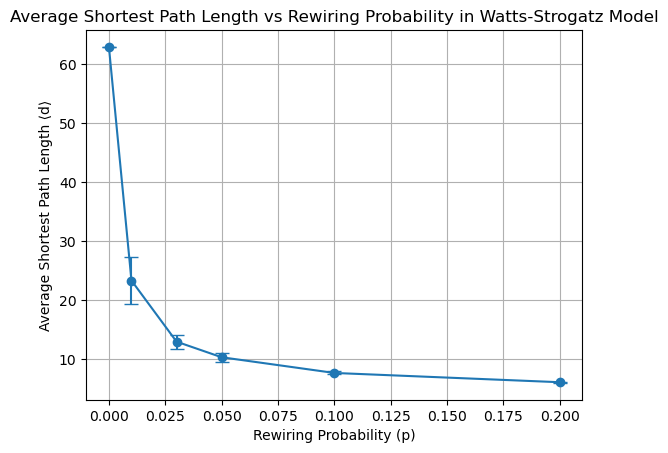

In [23]:
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
# Initialize dictionary to store results for each p value
results = {}
for prob in p:
    results[prob] = np.zeros(50)

# Generate 50 networks for each p value
for i in range(50):
    for prob in p:
        G = nx.watts_strogatz_graph(500, 4, prob)
        results[prob][i] = nx.average_shortest_path_length(G)

p0 = results[0]
p001 = results[0.01]
p003 = results[0.03]
p005 = results[0.05]
p01 = results[0.1]
p02 = results[0.2]

# Calculate means and standard deviations
means = [np.mean(p0), np.mean(p001), np.mean(p003), np.mean(p005), np.mean(p01), np.mean(p02)]
stds = [np.std(p0), np.std(p001), np.std(p003), np.std(p005), np.std(p01), np.std(p02)]

print("Averages and standard deviations:")
for i, prob in enumerate(p):
    print(f"p = {prob}: avg = {means[i]:.4f}, std = {stds[i]:.4f}")

# Create plot with error bars
plt.errorbar(p, means, yerr=stds, marker='o', capsize=5)
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length ⟨d⟩')
plt.title('Average Shortest Path Length vs Rewiring Probability in Watts-Strogatz Model')
plt.grid(True)
plt.show()

> The plot shows how the rewiring probability $(p)$ affects the average shortest path length $\langle d \rangle$ of a Watts-Strogatz network (N=500 nodes, $\langle k \rangle$). Each data point represents the mean $\langle d \rangle$ taken over 50 network simulations, with the error bars showing the standard deviation. It specifically highlights how quickly the rewiring mechanic introduces the small world phenomena in the network. With just 0.05 rewiring probability (changing 5% of the 1000 edges) the shortest distance becomes less than 1/6 of the p = 0 network. It's also seen that the sd-bands get very small even as relative values of the average, when we rewire a big enough part, then the avg shortest path length varies very little, showing that in a big enough network with completely random connections the shortest path lenght is very stable.

Reference: Barabási, A.-L. (2016). Network Science, Chapter 3, Section 3.8 and 3.9

### BA Edition

*[Insert your BA network implementation and analysis]*

**Questions answered:**
- Three slope-dependent regimes of power-law distributions
- Three regimes of non-linear preferential attachment

**Implementation:**
- BA network construction (100 nodes → 5000 nodes)
- Degree distribution analysis
- Linear and log-log plots

---


## Assignment 1.2: Stats and Visualization of the Rock Music Network

### Process Explanation

*[Describe your data collection process]*

**Steps:**
1. [Your process step-by-step]
2. [Most difficult parts]
3. [How LLMs helped]
4. [What you'd do differently]


### Simple Network Statistics and Analysis
*[Insert your network statistics]*

**Analysis includes:**
- Number of nodes and links
- In-degree and out-degree distributions
- Comparison with random and scale-free networks
- Top 5 most connected performers
- 10 pages with longest wiki entries


### Network Visualization

*[Insert your network visualization]*

**Visualization features:**
- Undirected network representation
- Node size proportional to degree
- Color mapping based on content length
- Force-directed layout algorithm

---

## References

*[List any references used]*

---

**Due Date:** Tuesday, September 30th, 2025 at 23:55

---

## Group Member Contributions

*[Describe how each group member contributed to the work]*

- **Thor Nørgaard Eriksen (s204618):** [Contributions]
- **Søren Mondrup (s214983):** [Contributions]